# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [27]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv("data/Employee.csv")
print(employee.shape)
employee

(9, 7)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
# Method 1
# your answer here
employee.groupby("Department").agg({"Salary":"mean"})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your answer here
employee.pivot_table(index=["Department"], values = ["Salary"])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
# your answer here
employee.pivot_table(index=["Department","Title"], values = ["Salary"])#.reset_index()

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
employee.pivot_table(index=["Title"], values = ["Years","Salary"])#.reset_index()
#or with departments still in it:
#employee.pivot_table(index=["Department","Title"], values = ["Years","Salary"])#.reset_index()

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
# your answer here
employee.pivot_table(index=["Department","Title"], values = ["Salary","Name"], aggfunc = {"Salary":'mean',"Name":'count'}).rename(columns={"Name":"Count"})#.reset_index()

Count  Salary
Department Title                   
HR         VP             1    70.0
           analyst        2    32.5
IT         VP             1    70.0
           analyst        2    32.5
           associate      1    60.0
Sales      associate      2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your answer here
employee.pivot_table(index=["Department","Title"], values = ["Salary"], aggfunc = ['median','min','max','std'])

#There is 3 rows that only aggregate 1 data value during pivoting. 
# For these trhee rows, a min, max and median can be calculated, but of course no standard deviation, as there is no deviation.

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your answer here
employee.pivot_table(index=["Department","Title"], values = ["Salary"], aggfunc = ['median','min','max','std'], dropna=False, fill_value=0) 

#I don't understand why, for me fill_value=0 only works with dropna=False. If I leave that parameter out fill_value does nothing.
# As far as I understand the documentation, that is not the expected behaviour...

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate    0.0      0      0  0.000000
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      VP           0.0      0      0  0.000000
           analyst      0.0      0      0  0.000000
           associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [11]:
# your answer here
employee.pivot_table(index=["Department"], values = ["Name","Salary"], aggfunc = {"Salary":'sum',"Name":'count'}).rename(columns={"Name":"No of employees","Salary":"Salary sum"})

,No of employees,Salary sum
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [12]:
# your answer here
employee.pivot_table(index=["Department","Title"], values = ["Years","Salary"], aggfunc = {"Salary":'mean',"Years":'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [23]:
# your answer here
def max_out(x):
    no_max = [k for k in x if k < x.max()]
    if len(no_max)>0:
        return sum(no_max)/len(no_max)
    else:
        return np.nan
    
employee.pivot_table(index=["Department"], values = ["Salary"], aggfunc = {"Salary":max_out}, dropna=False)

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,NaN


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [24]:
# your answer here
fitbit = pd.read_csv("data/Fitbit.csv")
print(employee.shape)
fitbit.head()

(9, 7)


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [9]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [7]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [26]:
# your answer here
fitbit[["Steps","Minutes Very Active"]].corr()

,Steps,Minutes Very Active
Steps,1.000000,0.571452
Minutes Very Active,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

Text(0, 0.5, 'Steps')

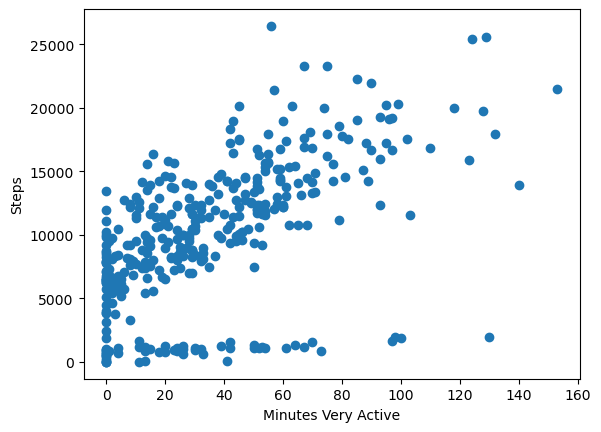

In [29]:
# your answer here
plt.scatter(x= fitbit["Minutes Very Active"], y=fitbit["Steps"])
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here
# There is a positive correlation of 0.57 between the two parameters, meaning on a day with more very active 
# minutes, there probably also occured more steps.
# There seems to be a second cluster in the data: Days with many very active minutes but less than 3000 steps. 
# That might point to a different sport undertaken on those days that does not accumulate steps.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [30]:
# your answer here
fitbit[["Steps","Minutes Sedentary"]].corr()

,Steps,Minutes Sedentary
Steps,1.000000,0.076906
Minutes Sedentary,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

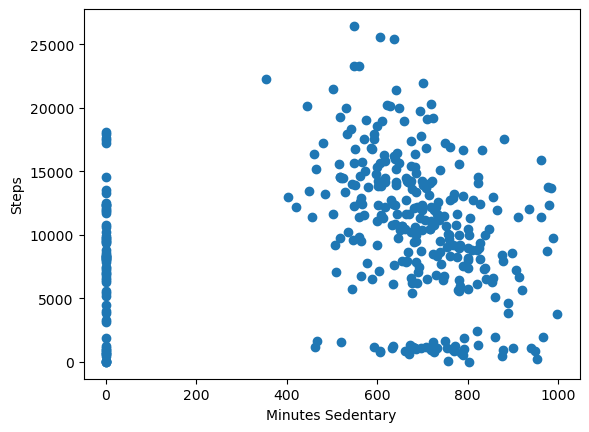

In [31]:
# your answer here
plt.scatter(x= fitbit["Minutes Sedentary"], y=fitbit["Steps"])
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")

# I would have expected a negative correlation: the more minutes are spent sitting, the less steps are occuring.
# However, there is only a very, very weak positive correlation in the numbers, and the graph does not show one.
# There is some days with 0 sedentary minutes and varying numbers of steps, that shows active days. 
# But more often, there seems to be an arbitrary mix between number of steps and minutes sedentary.
# It is interesting that there is either 0 minutes sedentary or anyting about 360 - that makes this probably a 
# profile of a working person with a desk job for at least 6 hours.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [37]:
# your answer here
fitbit[["Steps","MinutesOfSleep"]].corr()

,Steps,MinutesOfSleep
Steps,1.000000,0.130986
MinutesOfSleep,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

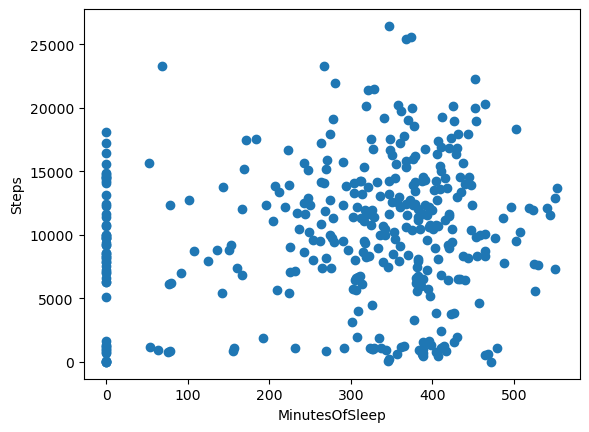

In [33]:
# your answer here
plt.scatter(x= fitbit["MinutesOfSleep"], y=fitbit["Steps"])
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
#This is similar to the previous outcome, there is only a weak positive correlation when computing it.
#In the plot no clear correlation can be seen. Again, there is two types of data.
#The first cluster is 0 minutes of sleep with varying numbers of steps - maybe the days when the fitbit was 
# taken of for the night.
#The rest of the data is a very scattered cloud, no correlation can be extracted.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [38]:
# your answer here
sel_column = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
corr_steps5 = fitbit[sel_column].corr()
corr_steps5

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [40]:
# your answer here
corr_steps5["Steps"].sort_values(ascending=False)

#The strongest correlation exists between Steps and Minutes Very Active with 0.57, that one was already examined.
#The variable Floors also has a positive correlation of 0.31 with steps, this seems very logical.
#The third correlation showing up is Calorie burned with 0.26, also logical but not the strongest correlation, 
# probably because other sports have a higher impact on this variable.
#The weak correlations with Minutes of sleep and Minutes sedentary were already discussed.

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [42]:
# your answer here
time_grades = pd.read_csv("data/Time_Grades.csv")
print(employee.shape)
time_grades

(9, 7)


,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

Text(0, 0.5, 'Grade')

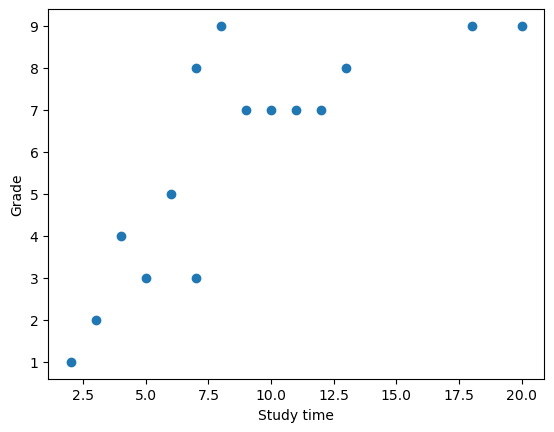

In [43]:
# your answer here
plt.scatter(x= time_grades["Study time"], y=time_grades["Grade"])
plt.xlabel("Study time")
plt.ylabel("Grade")

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [47]:
# your answer here
time_grades.corr("pearson")   # positive correlation of 0.798046
#time_grades.corr("spearman") # positive correlation of 0.819659

#There is a stron positive correlation between study time and grades.
#Pearsons r is used to check for linear correlations, and 0.80 is a high value. That can also be seen in the graph.
#However, the correlation value with Spearmans rank is even higher with 0.82. That makes sense with this graph, as 
# very long study times don't lead to better grades, grades top out at the best grade, and that can be reached with 
# less studying too. The correlation starts of looking linear and then turns into a curve, so spearman seems to fit 
# this data better.

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [ ]:
# your answer here
#already did the graph above and the description as well.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
#Pearson correlation only can be applied to linear correlations. It is based on taking in all datapoints, calculating out of
# the whole data, where datapoints would be expected to be (the regression line) - and then checking how far off they are 
# from that estimate.
#Spearmans rank works differently, as all datapoints are ranked, and then only compared with their direct neighbors - if the 
# relationship from one datapoint to the next always stays the same (only going up or only going down), a high correlation 
# value results. This allows also for curves in the dataset showing high correlations, though not for parabolas.